# Preprocessing

## 1. Import Essential Packages

In [1]:
# Import essential packages
import os
import missingno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn helper modules
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Plotting settings
# In case the font Cambria is not locally installed in you system, 
# comment out the line below
plt.rcParams['font.serif'] = "Cambria"
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = 10,6

# Set seed for reproducilibity
np.random.seed(0)

# Define paths that are necessary
DPATH = "../data/"
RPATH = "../results/"
IPATH = "../images/"

if "data" not in os.listdir("../"):
    os.mkdir(DPATH)
if "images" not in os.listdir("../"):
    os.mkdir(IPATH)
if "results" not in os.listdir("../"):
    os.mkdir(RPATH)

In [6]:
df = pd.read_csv(DPATH+"cleaned_data.csv", index_col=0)
X = df[df.columns[2:]].values
df

,strain_slug,region,tot_thc,tot_cbd,tot_cbg,tot_cbc,tot_cbn,tot_thcv,tot_ocimene,camphene,...,humulene,caryophyllene,limonene,linalool,myrcene,bisabolol,b_pinene,a_terpinene,terpinolene,a_pinene
u_id,,,,,,,,,,,,,,,,,,,,,
0,Sample_0,0,0.934875,0.002195,0.051035,0.000000,0.0,0.011895,0.126627,0.005041,...,0.109391,0.282619,0.080244,0.016521,0.089255,0.014919,0.057590,0.005041,0.161961,0.038028
1,Sample_1,0,0.942376,0.004544,0.047952,0.002478,0.0,0.002651,0.215732,0.005758,...,0.082561,0.181566,0.073240,0.005758,0.115024,0.005758,0.040225,0.007331,0.210494,0.035078
2,Sample_2,0,0.942578,0.004096,0.047829,0.002907,0.0,0.002590,0.208189,0.006220,...,0.087307,0.190361,0.069086,0.013722,0.110446,0.006220,0.036003,0.007452,0.209503,0.030722
3,Sample_3,0,0.966836,0.003003,0.025930,0.001726,0.0,0.002504,0.008019,0.008019,...,0.134423,0.308981,0.108156,0.044945,0.295542,0.039173,0.028637,0.000000,0.000000,0.016085
4,Sample_4,0,0.934829,0.003692,0.049598,0.000000,0.0,0.011880,0.129744,0.008177,...,0.104336,0.259848,0.094910,0.023999,0.081292,0.008177,0.068392,0.008177,0.147166,0.046147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88943,Sample_88943,1,0.938651,0.002171,0.059177,0.000000,0.0,0.000000,0.000000,0.002157,...,0.092752,0.290768,0.195427,0.060828,0.251079,0.029767,0.029336,0.000000,0.000000,0.017256
88944,Sample_88944,1,0.950399,0.002075,0.047527,0.000000,0.0,0.000000,0.000000,0.006301,...,0.069307,0.221872,0.257426,0.109811,0.207921,0.029253,0.044104,0.000000,0.008101,0.025653
88980,gods-gift,1,0.969916,0.002917,0.026502,0.000665,0.0,0.000000,0.059835,0.002063,...,0.091472,0.191197,0.046080,0.020633,0.366575,0.038514,0.045392,0.000000,0.000000,0.097662


In [9]:
# Pipeline and PCA
model = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
model.fit(X)
X_transformed = model.transform(X)

In [10]:
X_transformed.shape

(26033, 20)

90% Variance is explained by: 13 PCs


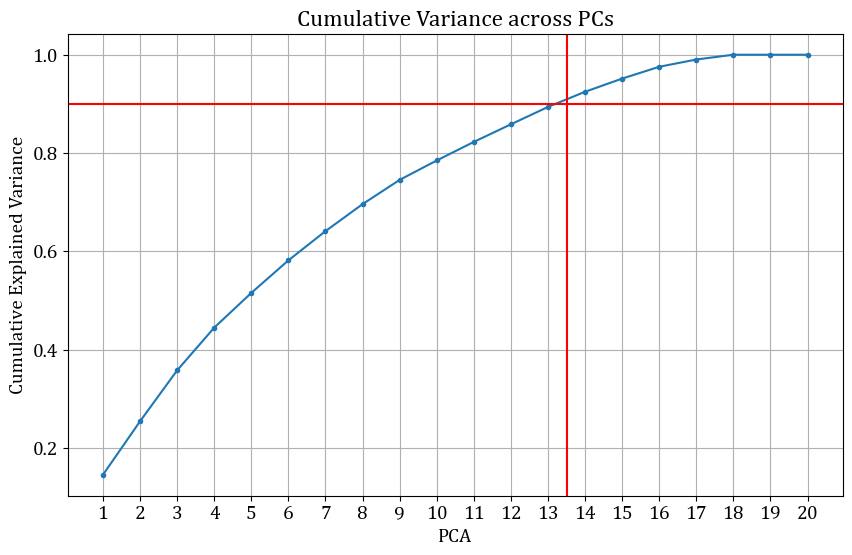

In [36]:
exp_var = model["pca"].explained_variance_ratio_
plt.plot(range(1, len(exp_var)+1), np.cumsum(exp_var), ".-", label="Cumulative Explained variance")

plt.axhline(0.9, color="r", linestyle="-")

position_x = np.where(np.cumsum(exp_var) > 0.9)[0][0]
print("90% Variance is explained by:", position_x, "PCs")
plt.axvline(position_x+0.5, color="r", linestyle="-")

plt.xticks(range(1, len(exp_var)+1))
plt.xlabel("PCA")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Variance across PCs")
plt.show()

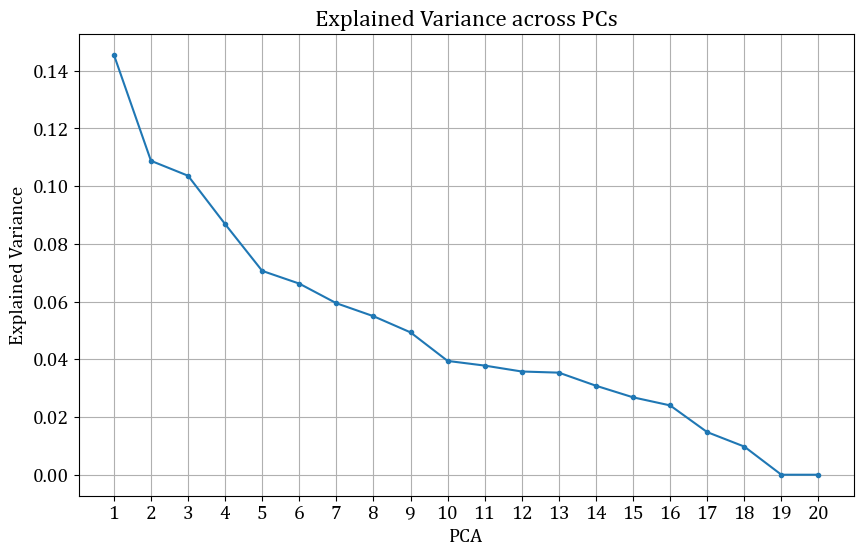

In [32]:
plt.plot(range(1, len(exp_var)+1), exp_var, ".-", label="Explained variance")
plt.xticks(range(1, len(exp_var)+1))
plt.xlabel("PCA")
plt.ylabel("Explained Variance")
plt.title("Explained Variance across PCs")
plt.show()

More than 90% variance is explained by the top 13 PCs

## Plots

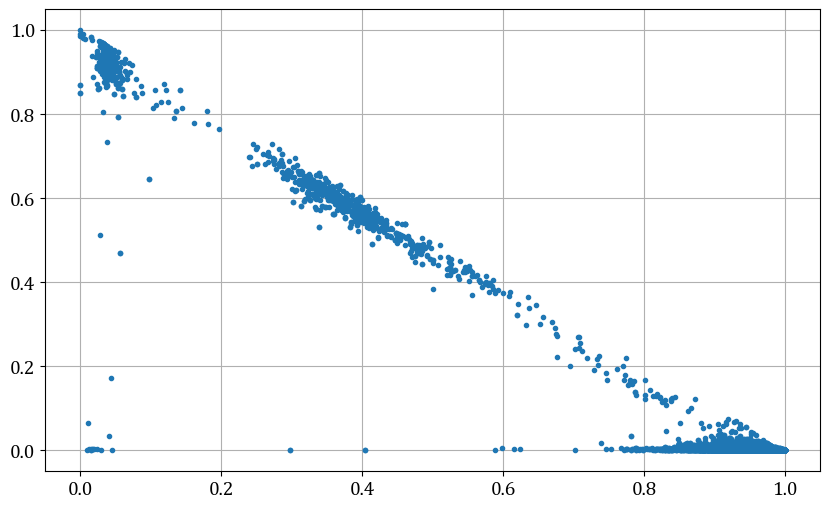